# Project Random Forest Regression

In this notebook a random forest regression algortihm will be used to predict the units ordered for a specific medication type

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset
Below you can see the dataset in it's current state

In [2]:
df = pd.read_csv("../pharmacy_with_pop_2020.csv")
df.head()

,Delivery Date,Pharmacy No,Pharmacy Post,YOB,Gender,CNK,Product Name,ATC,Units,Price,Contribution,Age,Age Group,Province,ATC_Classification,Medication_Type,year,M,F,Total Population
0,2017-01-01,7341765,21,1923,1,5520523,WACHTHONORARIUM,,0,4.90,0.00,94,90-94,Antwerp,Unknown,Unknown,2017,4153.0,9410.0,13563.0
1,2017-01-01,7341765,21,1925,1,1799931,"ZALDIAR 37,5 MG/325 MG FILMOMH TABL 20",N02AJ13,20,9.26,3.62,92,90-94,Antwerp,Nervous system,Analgesic drugs,2017,4153.0,9410.0,13563.0
2,2017-01-01,8272695,16,1930,2,1719400,VASEXTEN CAPS BLIST 28 X 10 MG,C08CA12,28,19.22,4.98,87,85-89,Flemish Brabant,Cardiovascular system,Calcium channel blockers,2017,7858.0,13941.0,21799.0
3,2017-01-01,8272695,16,1933,2,5520523,WACHTHONORARIUM,,0,4.90,0.00,84,80-84,Flemish Brabant,Unknown,Unknown,2017,13956.0,19571.0,33527.0
4,2017-01-01,9111423,10,1931,1,1750132,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,H02AB02,1,6.15,0.39,86,85-89,Brussels,"Systemic hormonal preparations, excluding repr...",Corticosteroids systemic,2017,5236.0,11270.0,16506.0


### Selecting properties

Below you can select the prefered medication type and frequency (Y, M, W, D)

In [3]:
MedicationType = 'Psychoanaleptics'
Frequency= 'M'
Province = 'Antwerp'

After selecting a medication type, it will be filtered from the dataset

In [4]:
is_Med = df['Medication_Type'] == MedicationType
df2 = df[is_Med]
df2.head()

,Delivery Date,Pharmacy No,Pharmacy Post,YOB,Gender,CNK,Product Name,ATC,Units,Price,Contribution,Age,Age Group,Province,ATC_Classification,Medication_Type,year,M,F,Total Population
40,2017-01-01,7641438,40,1970,2,3183092,CYMBALTA 60 MG MAAGSAPRESIST. CAPS 98 X 60 MG,N06AX21,98,53.30,13.67,47,45-49,Liege,Nervous system,Psychoanaleptics,2017,37707.0,37199.0,74906.0
838,2017-01-01,9123123,86,1899,0,126987,REDOMEX DIFFUCAPS CAPS 40 X 25 MG,N06AA09,40,7.22,0.91,118,100+,West Flanders,Nervous system,Psychoanaleptics,2017,31.0,201.0,232.0
839,2017-01-01,7056201,89,1899,0,127019,REDOMEX DIFFUCAPS CAPS 40 X 50 MG,N06AA09,40,8.83,0.89,118,100+,West Flanders,Nervous system,Psychoanaleptics,2017,31.0,201.0,232.0
978,2017-01-01,7067208,20,1899,0,1390343,SERLAIN 50 MG COMP PELL 30 X 50 MG,N06AB06,30,14.96,2.14,118,100+,Antwerp,Nervous system,Psychoanaleptics,2017,36.0,234.0,270.0
1269,2017-01-01,7122399,30,1899,0,1625672,FLUOXETINE EG CAPS 56 X 20 MG,N06AB03,56,25.74,4.26,118,100+,Flemish Brabant,Nervous system,Psychoanaleptics,2017,17.0,138.0,155.0


In [5]:
is_Prov = df['Province'] == Province
df2 = df2[is_Prov]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [6]:
df2['Delivery Date'] = df2['Delivery Date'].astype('datetime64[ns]')
df2.head()

,Delivery Date,Pharmacy No,Pharmacy Post,YOB,Gender,CNK,Product Name,ATC,Units,Price,Contribution,Age,Age Group,Province,ATC_Classification,Medication_Type,year,M,F,Total Population
978,2017-01-01,7067208,20,1899,0,1390343,SERLAIN 50 MG COMP PELL 30 X 50 MG,N06AB06,30,14.96,2.14,118,100+,Antwerp,Nervous system,Psychoanaleptics,2017,36.0,234.0,270.0
2435,2017-01-01,3790968,21,1899,0,2967065,SERLAIN 50 MG COMP PELL 100 X 50 MG,N06AB06,100,32.58,5.24,118,100+,Antwerp,Nervous system,Psychoanaleptics,2017,36.0,234.0,270.0
2483,2017-01-01,7084071,20,1899,0,2999860,SIPRALEXA 10 MG TABL 98 X 10 MG,N06AB10,98,26.78,9.88,118,100+,Antwerp,Nervous system,Psychoanaleptics,2017,36.0,234.0,270.0
2592,2017-01-01,7084071,20,1899,0,3179959,"DEANXIT 10 MG FILMOMH TABL 30 X 10 MG/0,5 MG",N06CA02,30,6.28,6.28,118,100+,Antwerp,Nervous system,Psychoanaleptics,2017,36.0,234.0,270.0
2607,2017-01-01,7122423,20,1899,0,3183092,CYMBALTA 60 MG MAAGSAPRESIST. CAPS 98 X 60 MG,N06AX21,98,53.30,8.12,118,100+,Antwerp,Nervous system,Psychoanaleptics,2017,36.0,234.0,270.0


### Create a new dataframe

Now it has to create a new dataframe to sum the units on the selected frequency

In [7]:
res = df2.set_index('Delivery Date').groupby([pd.Grouper(freq=Frequency), 'Total Population', 'Age Group'])['Units'].sum().reset_index()

print(res)

    Delivery Date  Total Population Age Group   Units
0      2017-01-31             270.0      100+     566
1      2017-01-31            2778.0     95-99    2062
2      2017-01-31           13563.0     90-94   10990
3      2017-01-31           34356.0     85-89   30608
4      2017-01-31           53729.0     80-84   49862
..            ...               ...       ...     ...
869    2020-07-31          120343.0     45-49   66628
870    2020-07-31          121504.0     30-34   32988
871    2020-07-31          123123.0     35-39   41350
872    2020-07-31          128978.0     50-54   91270
873    2020-07-31          132846.0     55-59  111436

[874 rows x 4 columns]


In [8]:
res['Month'] = 0
res['Month'] = pd.DatetimeIndex(res['Delivery Date']).month
res.head()

,Delivery Date,Total Population,Age Group,Units,Month
0,2017-01-31,270.0,100+,566,1
1,2017-01-31,2778.0,95-99,2062,1
2,2017-01-31,13563.0,90-94,10990,1
3,2017-01-31,34356.0,85-89,30608,1
4,2017-01-31,53729.0,80-84,49862,1


### Converting the age groups

To be able to use the age groups it has to be converted to numerical data, so we do that by changing '0-4' to a 1, '5-9' to a 2, etc.

In [9]:
res['Age'] = 0
res['Age'] = res['Age Group'].map( {'0-4': 1, '5-9': 2, '10-14': 3, '15-19': 4, '20-24': 5, '25-29': 6, '30-34': 7, '35-39': 8, '40-44': 9, '45-49': 10, '50-54': 11, '55-59': 12, '60-64': 13, '65-69': 14, '70-74': 15, '75-79': 16, '80-84': 17, '85-89': 18, '90-94': 19, '95-99': 20, '100+': 20, } ).astype(int)
res.head(5)

,Delivery Date,Total Population,Age Group,Units,Month,Age
0,2017-01-31,270.0,100+,566,1,20
1,2017-01-31,2778.0,95-99,2062,1,20
2,2017-01-31,13563.0,90-94,10990,1,19
3,2017-01-31,34356.0,85-89,30608,1,18
4,2017-01-31,53729.0,80-84,49862,1,17


In [10]:
res['Total Population'] = res['Total Population'].astype(float)
res.dtypes
res = res.reset_index()
res.head()

,index,Delivery Date,Total Population,Age Group,Units,Month,Age
0,0,2017-01-31,270.0,100+,566,1,20
1,1,2017-01-31,2778.0,95-99,2062,1,20
2,2,2017-01-31,13563.0,90-94,10990,1,19
3,3,2017-01-31,34356.0,85-89,30608,1,18
4,4,2017-01-31,53729.0,80-84,49862,1,17


### Swapping column placement

To normalize the data it is easier when the columns that are to be normalized are al next to each other so Age Group and Age are swapped

In [11]:
cols = list(res.columns)
a, b = cols.index('Age Group'), cols.index('Age')
cols[b], cols[a] = cols[a], cols[b]
res = res[cols]

### Normalizing the data

To make sure that the data shares a common scale we use the minmaxscaler to normalize the data

In [12]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
res[[i for i in list(res.columns)[2:5]]] = minmax.fit_transform(res[[i for i in list(res.columns)[2:5]]])
print(res)

     index Delivery Date  Total Population       Age     Units  Month  \
0        0    2017-01-31          0.000385  1.000000  0.003593      1   
1        1    2017-01-31          0.018964  1.000000  0.013437      1   
2        2    2017-01-31          0.098855  0.947368  0.072185      1   
3        3    2017-01-31          0.252882  0.894737  0.201277      1   
4        4    2017-01-31          0.396390  0.842105  0.327973      1   
..     ...           ...               ...       ...       ...    ...   
869    869    2020-07-31          0.889841  0.473684  0.438297      7   
870    870    2020-07-31          0.898441  0.315789  0.216938      7   
871    871    2020-07-31          0.910434  0.368421  0.271962      7   
872    872    2020-07-31          0.953806  0.526316  0.600447      7   
873    873    2020-07-31          0.982459  0.578947  0.733145      7   

    Age Group  
0        100+  
1       95-99  
2       90-94  
3       85-89  
4       80-84  
..        ...  
869     45-

### Creating the model

After all the preprocessing the model can be made, we use Total Population and Age to predict the Units

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X = res[['Total Population', 'Age']].values
y = res['Units'].values
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0
)
slr = RandomForestRegressor()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
#print('Slope: %.3f' % slr.coef_[0])
#print('Intercept: %.3f' % slr.intercept_)

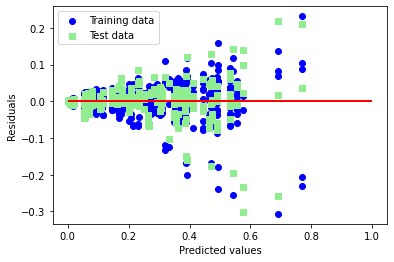

In [14]:
plt.scatter(y_train_pred, y_train_pred - y_train,
    c='blue', marker='o', label='Training data'
)
plt.scatter(y_test_pred,  y_test_pred - y_test,
    c='lightgreen', marker='s', label='Test data'
)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-0, xmax=1, lw=2, color='red')
plt.show()

### Measuring accuracy

After making the model we can check it's accuracy and visualize it by plotting a bar chart

In [18]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import metrics
print("Mean Squared Error: ",mean_squared_error(y_test, y_test_pred))
errors = abs(y_test_pred-y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('R2 score: ',r2_score(y_test, y_test_pred))
#print('Median Absolute Error: ',median_absolute_error(y_test, y_test_pred))
print('Random Forest Regression Accuracy: ', slr.score(X_test,y_test)*100)

y_pred_kf_lr = cross_val_predict(slr, X, y, cv=15 )

#Mutiple Linear Regression Accuracy with cross validation (KFold method)
accuracy_lf = metrics.r2_score(y, y_pred_kf_lr)
print('Cross-Predicted(KFold) Random Forest Regression Accuracy: ', accuracy_lf*100)

Mean Squared Error:  0.0027160120802655206
Mean Absolute Error: 0.03
R2 score:  0.929009033588848
Random Forest Regression Accuracy:  92.9009033588848
Cross-Predicted(KFold) Random Forest Regression Accuracy:  90.99750511112981


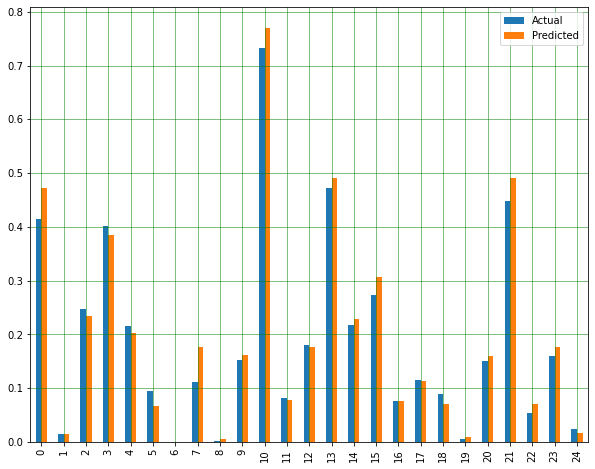

In [16]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()